In [1]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils import benchmark
import pandas as pd
import matplotlib.pyplot as plt

# from condensed_sparsity.models import LinearCondensed

/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda-11.8'


In [2]:
# import pickle
# threads = 2
# device = "cpu"
# compiler = "inductor"
# dtype="torch.float32"
# file_name = f"benchmark_v2_{device}_threads_{threads}_compiler_{compiler}_dtype_{dtype}final_smaller_layer.pkl"
# with open(f"../{file_name}", "rb") as handle:
#     compare = pickle.load(handle)
# print(compare)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"


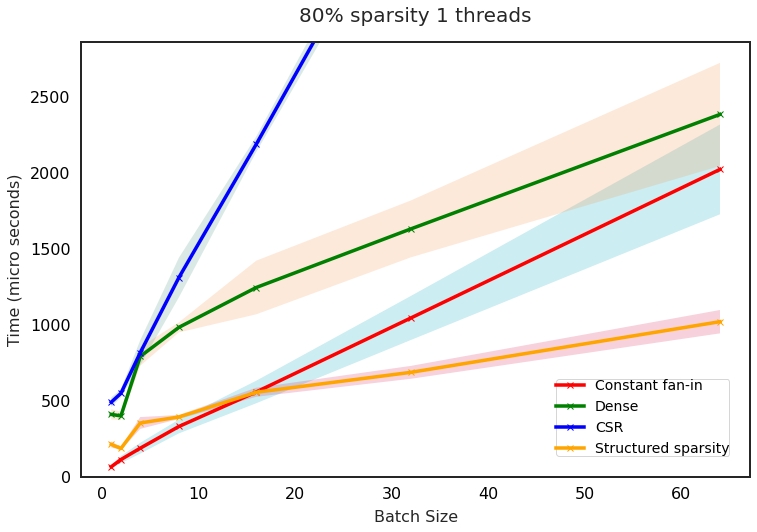

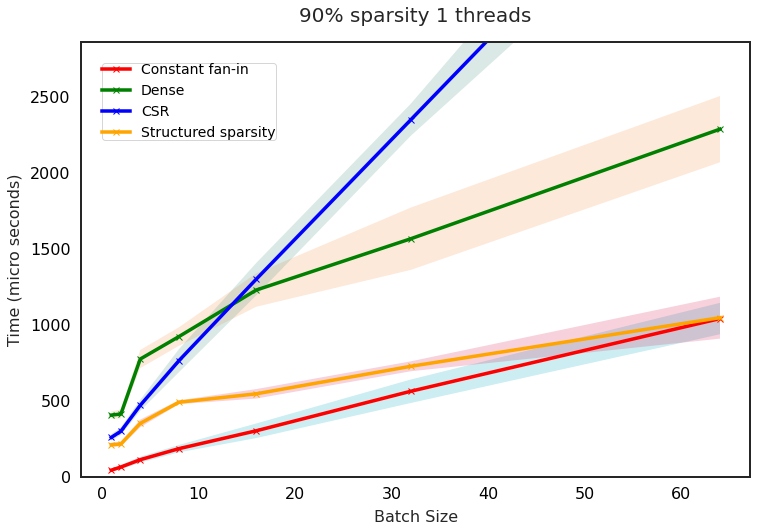

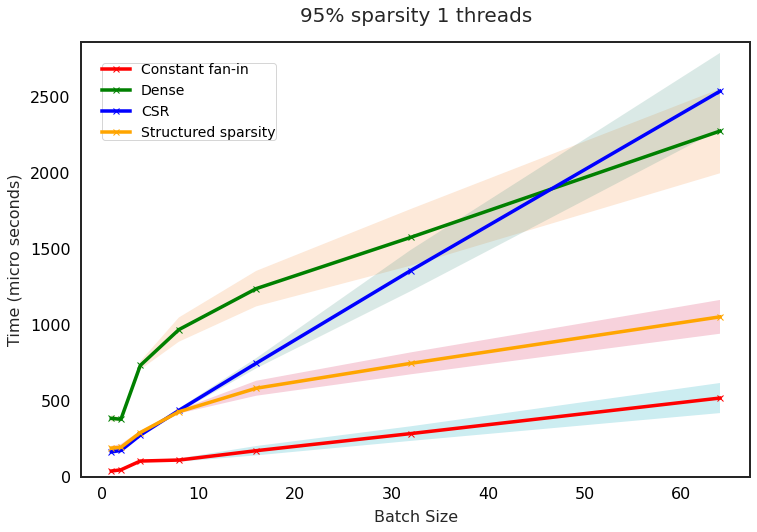

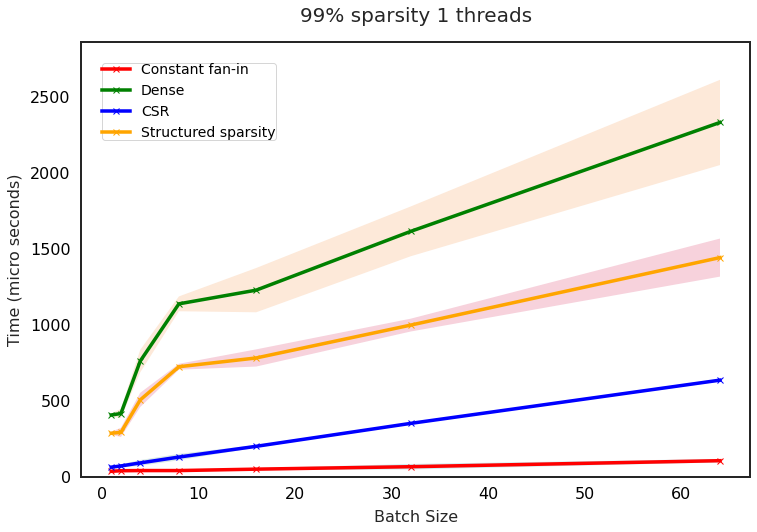

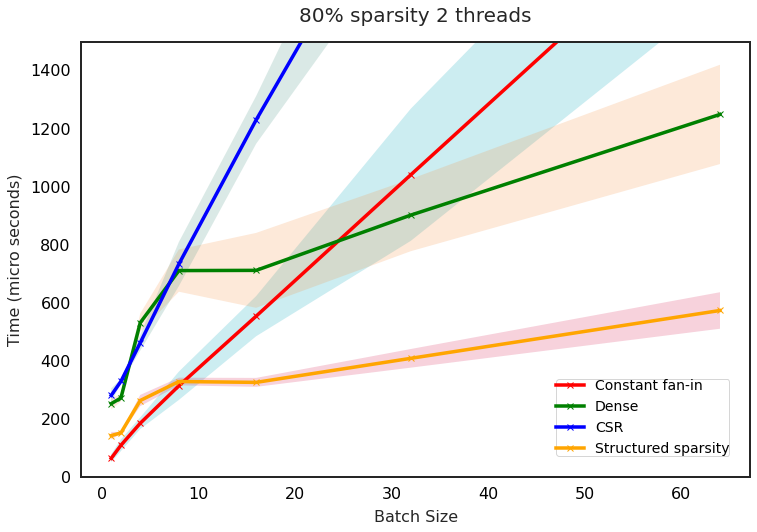

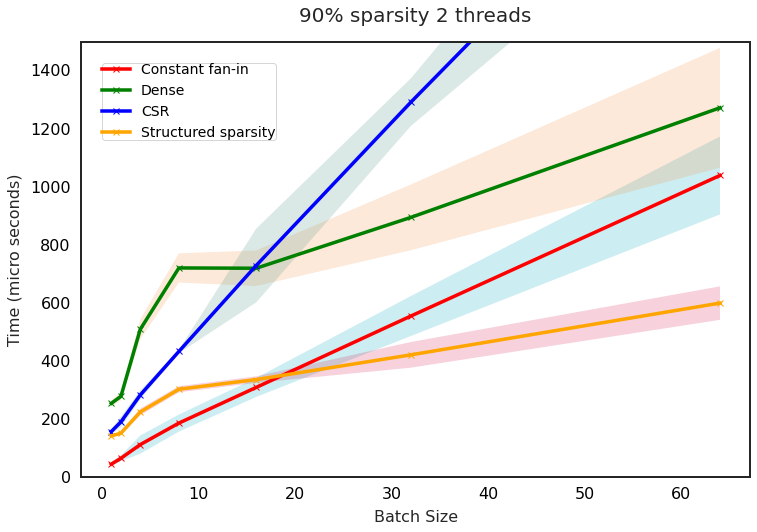

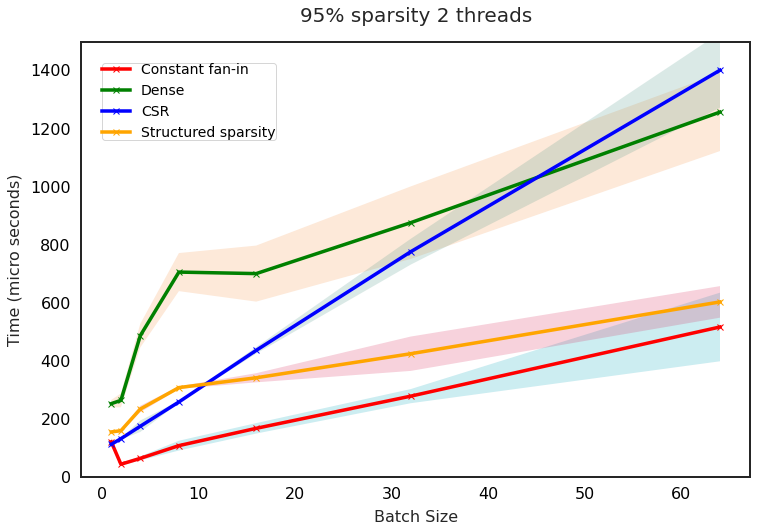

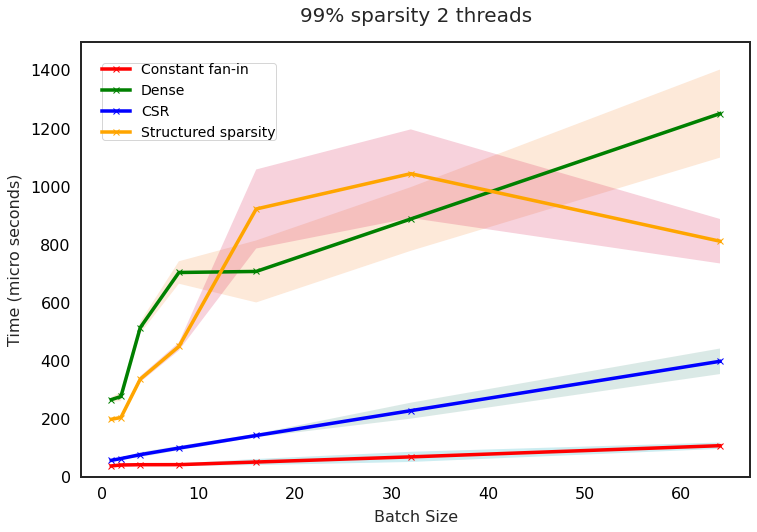

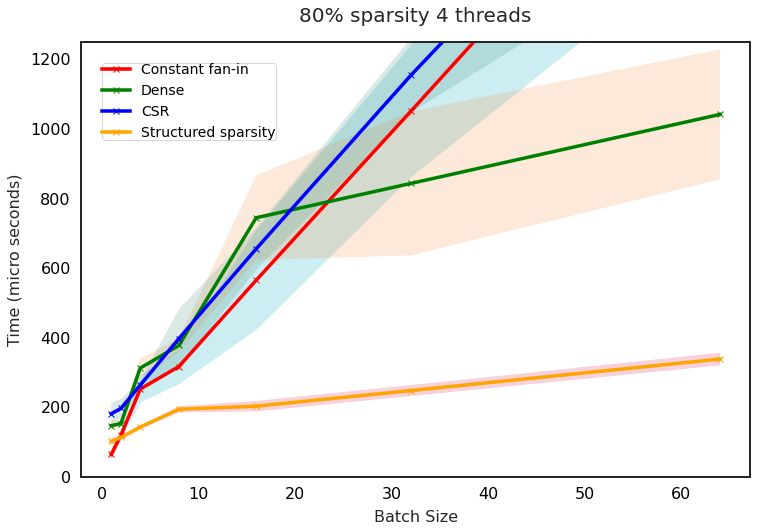

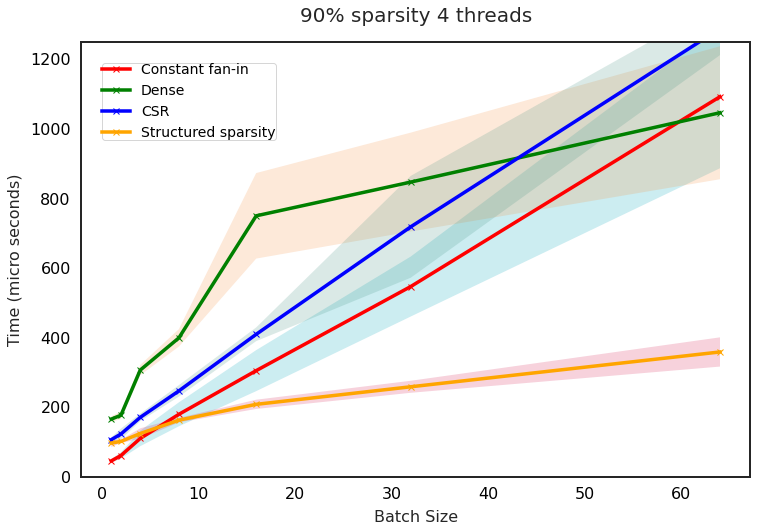

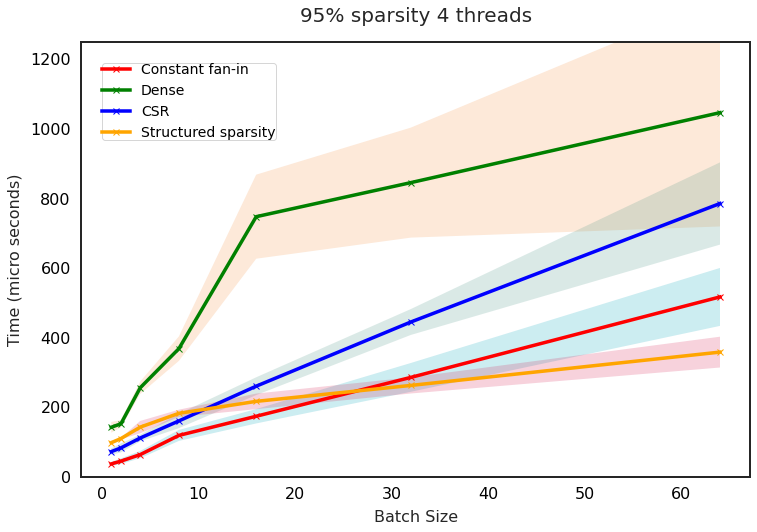

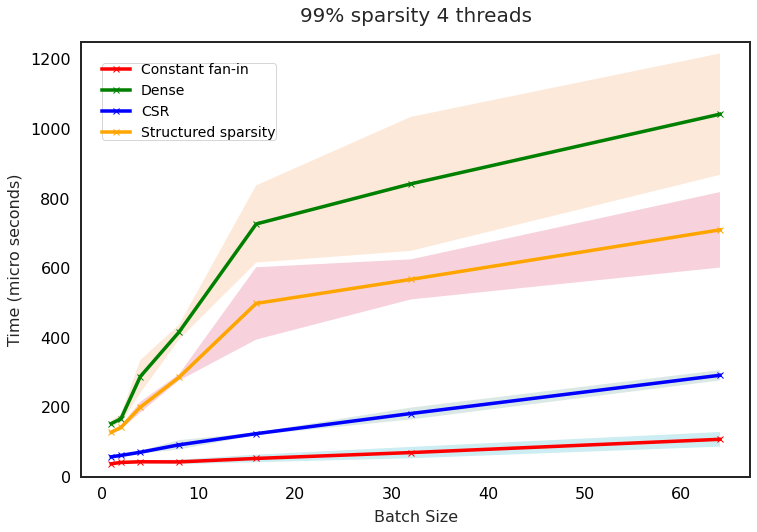

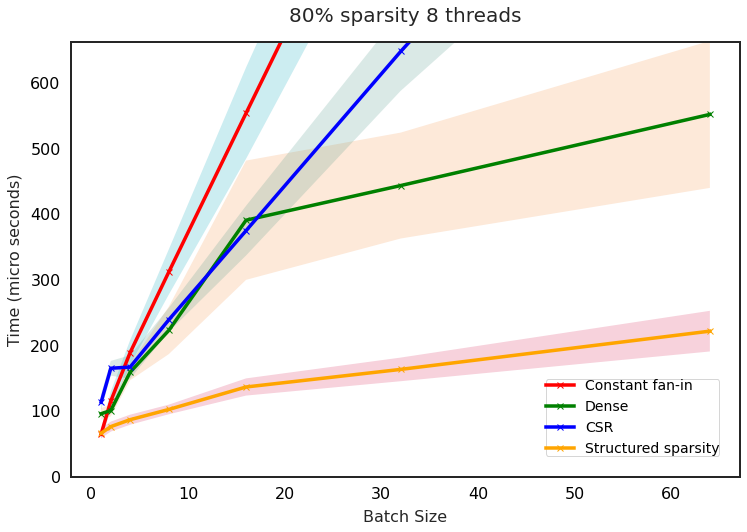

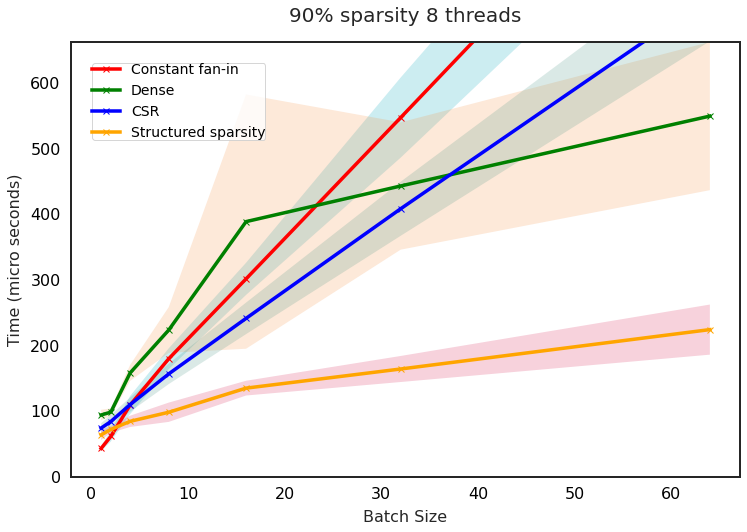

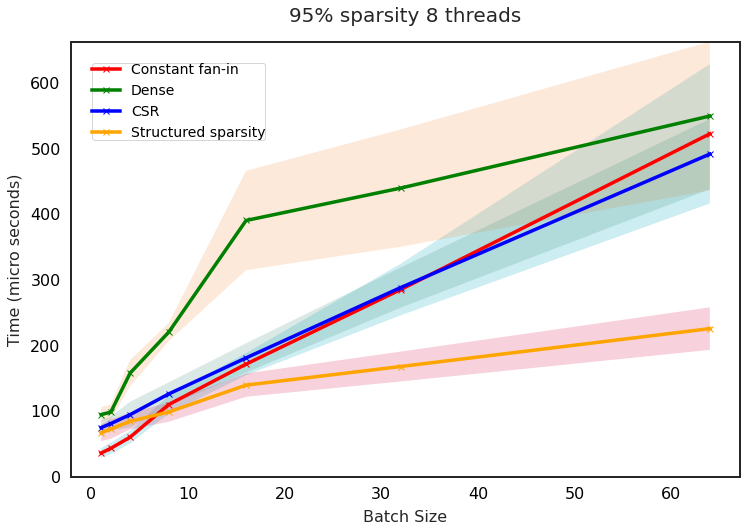

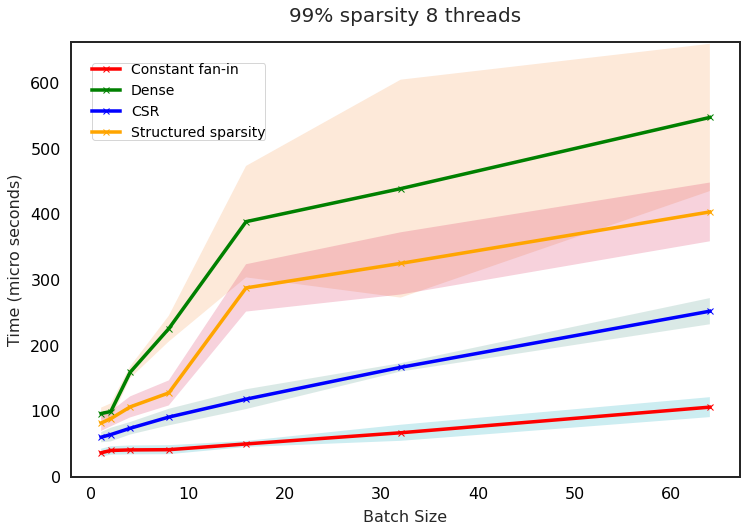

In [3]:
import re
import pandas as pd
import numpy as np
plt.style.use("../plt_plot_style.mplstyle")
target_descriptions = {
    "Fine-grained + structured with backend inductor": "Constant fan-in",
    "Dense benchmark - Compiled - backend inductor": "Dense",
    "Structured sparsity compiled with backend - inductor": "Structured sparsity",
    "csr only compiled with backend - inductor": "CSR"
    # "Vmap - eager"
}
data = {
    "sparsity": [],
    "batch_size": [],
    "num_features": [],
    "time": [],
    "std": [],
    "description": []
}



import pickle
for threads in [1,2,4,8,]:
# threads = 2
    device = "cpu"
    compiler = "inductor"
    dtype="torch.float32"
    file_name = f"benchmark_v2_{device}_threads_{threads}_compiler_{compiler}_dtype_{dtype}final_hector_second_run.pkl"
    with open(f"../{file_name}", "rb") as handle:
        compare = pickle.load(handle)
    # print(compare)

    _y_lim = None
    for _sparsity in [80, 90, 95, 99]:
        data = {
            "sparsity": [],
            "batch_size": [],
            "num_features": [],
            "time": [],
            "std": [],
            "description": []
        }
        # _sparsity = 99
        for measurement in compare._results:
            sparsity_match = re.match(f"Sparsity ([0-9]*)", measurement.title)
            sparsity = sparsity_match.groups()[0]

            thread_match = re.match(f".*with ([0-9]*) threads.*", measurement.title)
            threads = thread_match.groups()[0]
            desc = measurement.description
            if int(sparsity) not in [_sparsity,]:
                continue
            if desc not in target_descriptions.keys():
                continue
            # if desc == "Dense benchmark - Compiled - backend inductor" and int(sparsity) != 95:
            #     continue
            data["description"].append(target_descriptions[desc])
            data["sparsity"].append(int(sparsity))
            batch, num_features = re.findall(r"[0-9]+", measurement.sub_label)
            data["batch_size"].append(int(batch))
            data["num_features"].append(int(num_features))
            data["time"].append(measurement.median*1e6)
            data["std"].append(np.std(measurement.times)*1e6)
        df = pd.DataFrame(data)
        df = df.sort_values(by="batch_size", ascending=True)
        fig, ax = plt.subplots(figsize=(12,8))
        df = df.loc[df["batch_size"]<=64]  # TODO: Also sort by desc?
        lines = ["solid", "dashed", "dashdot", "dotted"]
        colours = ["red", "green", "blue", "orange"]
        for i, d in enumerate(df["description"].unique()):
            colour = colours[i]
            for ii, s in enumerate(df["sparsity"].unique()):
                line = lines[ii]
                df_slice = df.loc[(df["sparsity"] == s) & (df["description"]==d)]
                # df_slice = df_slice.groupby("batch_size").agg(mean_time=("time", "mean"), std_time=("time", "std")).reset_index()
                if len(df_slice) > 0:
                    ax.plot(df_slice["batch_size"], df_slice["time"], label=f"{d}", marker="x", ls=line, color=colour)
                    ax.fill_between(
                        df_slice["batch_size"],
                        df_slice["time"]+df_slice["std"],
                        df_slice["time"]-df_slice["std"],
                        alpha=0.2
                    )
        y_max = df.loc[df["description"]=="Dense"]["time"].max() 
        if _y_lim is None:
            _y_lim = y_max + y_max * 0.2
        plt.ylim(top=_y_lim, bottom=0)
        plt.legend()
        plt.ylabel("Time (micro seconds)")
        plt.xlabel("Batch Size")
        # plt.grid(True, which="both")

        plt.title(f"{_sparsity}% sparsity {threads} threads")
        # ax.set_xscale("log")
        # ax.set_yscale("log")
        plt.show()
        fig.savefig(f"../figs/threads-{threads}-sparsity-{_sparsity}.png", dpi=400, transparent=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


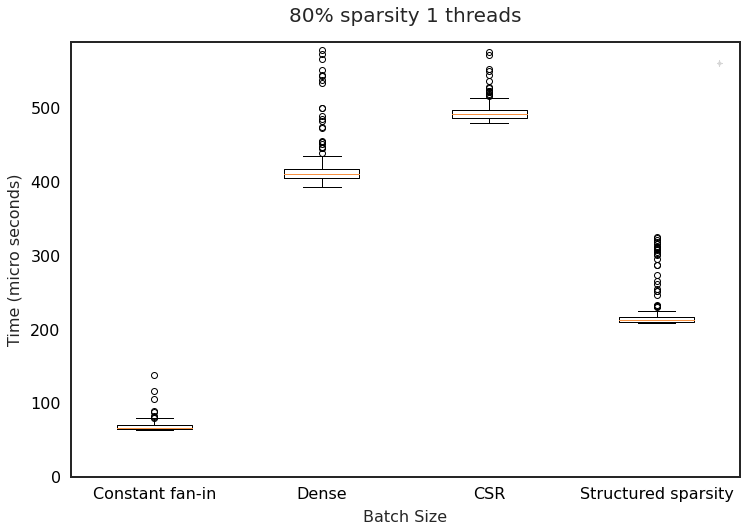

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


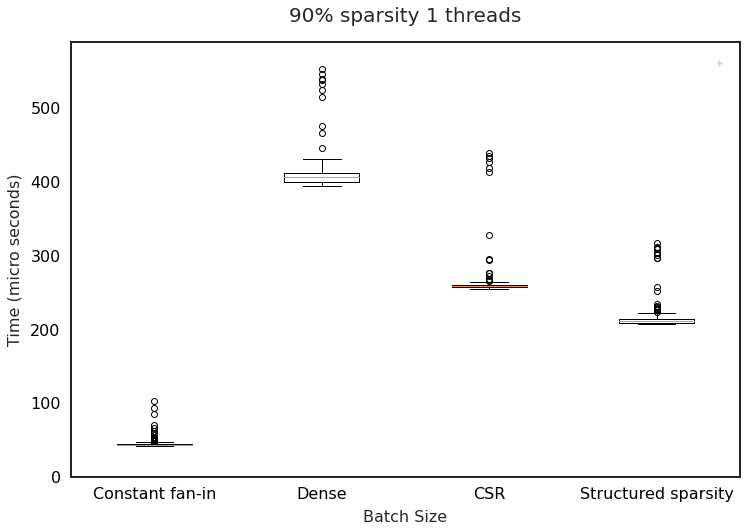

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


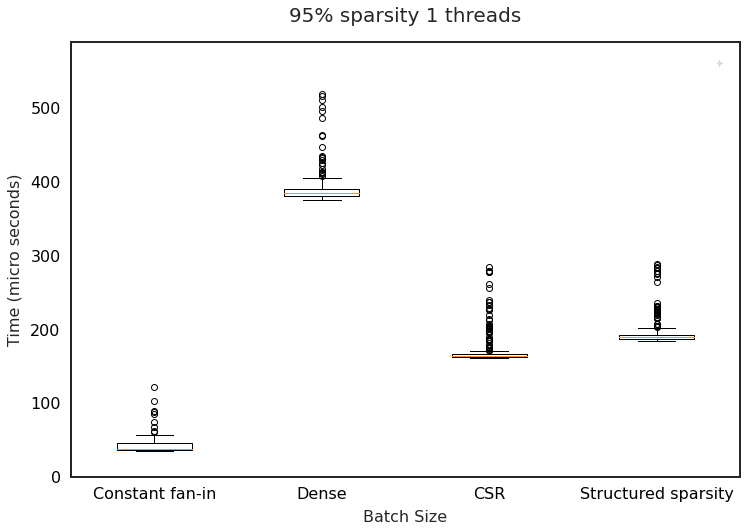

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


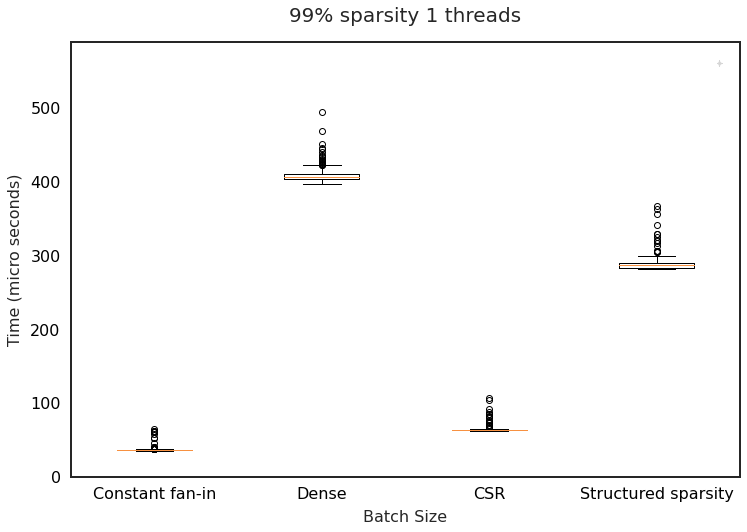

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


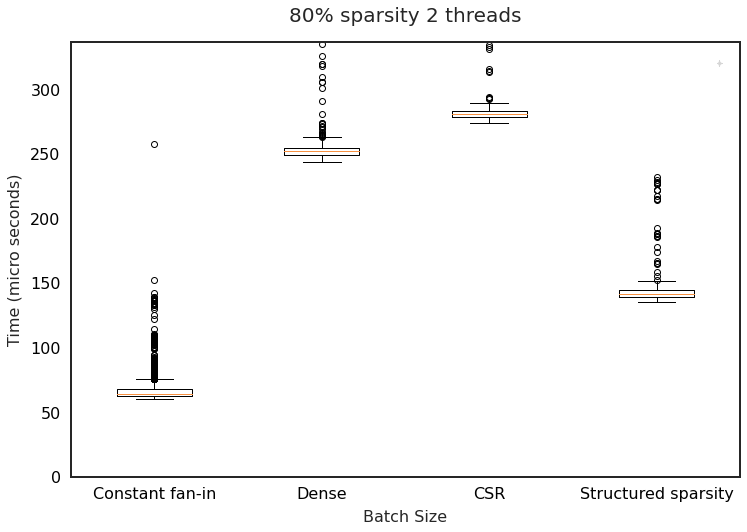

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


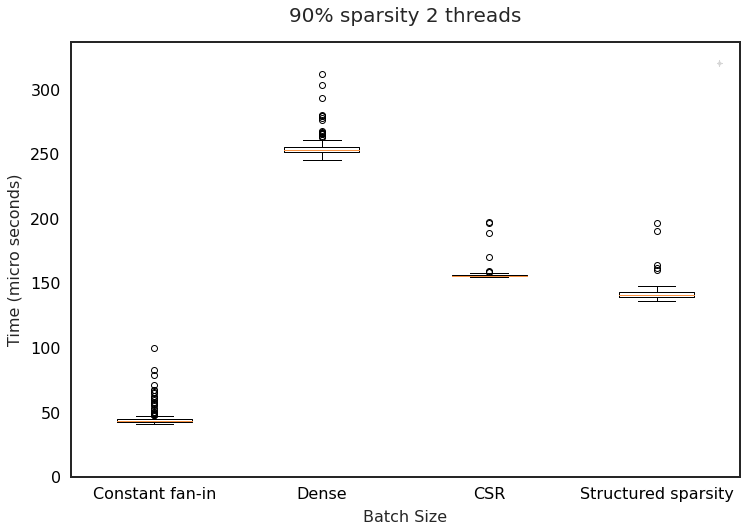

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


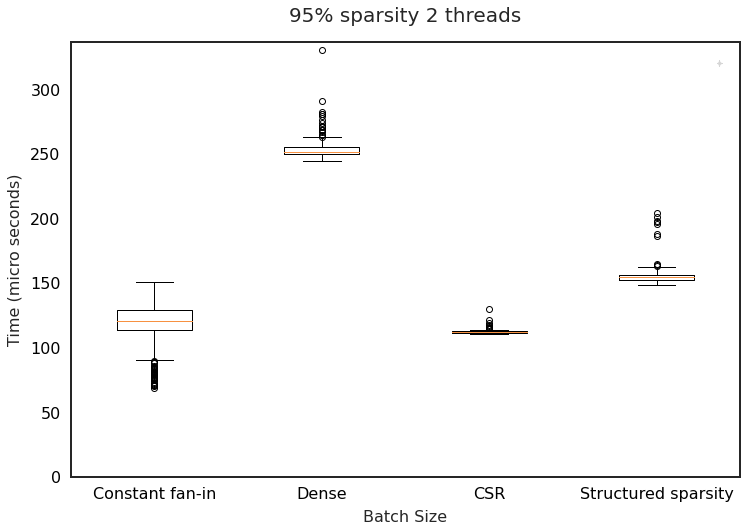

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


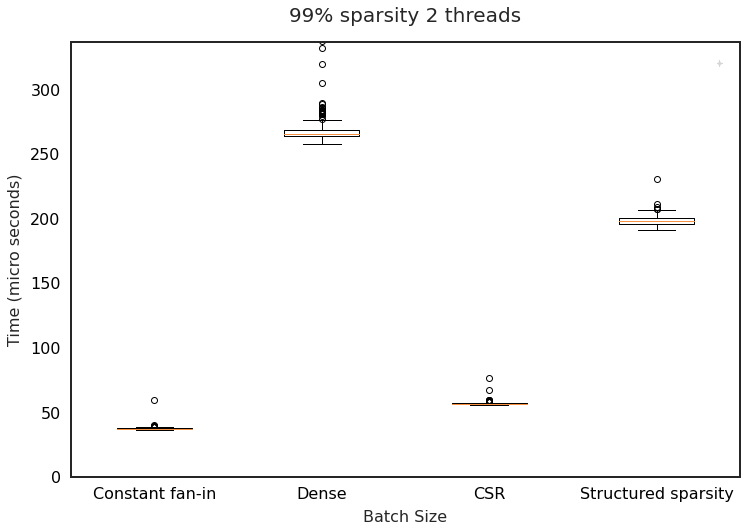

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


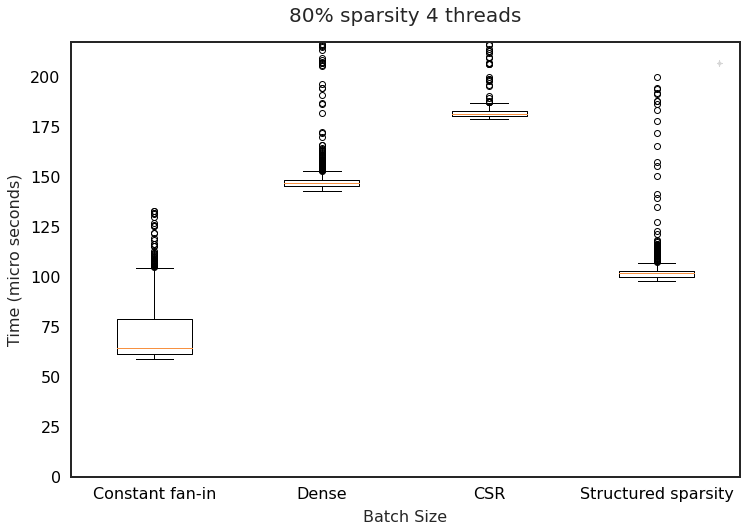

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


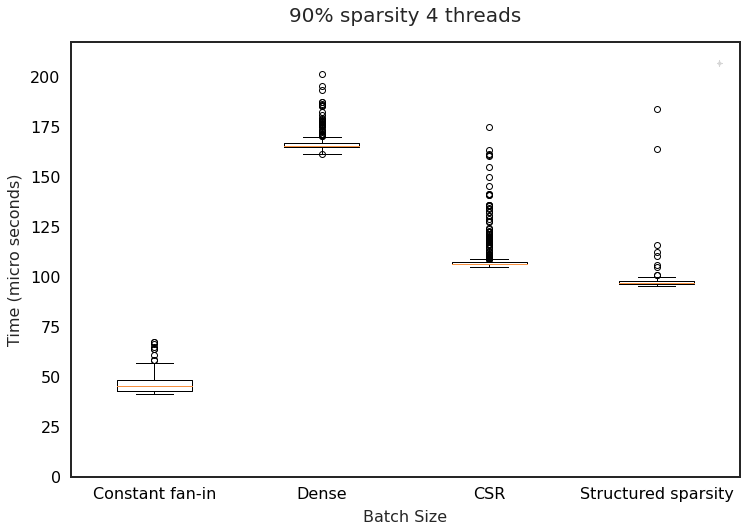

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


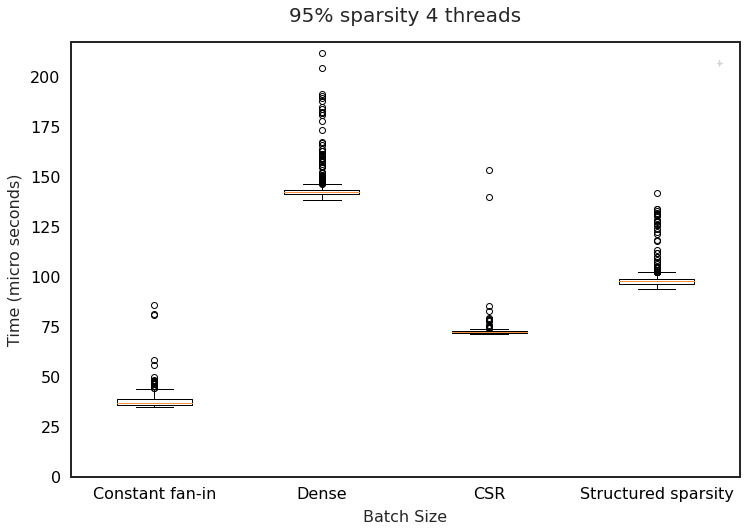

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


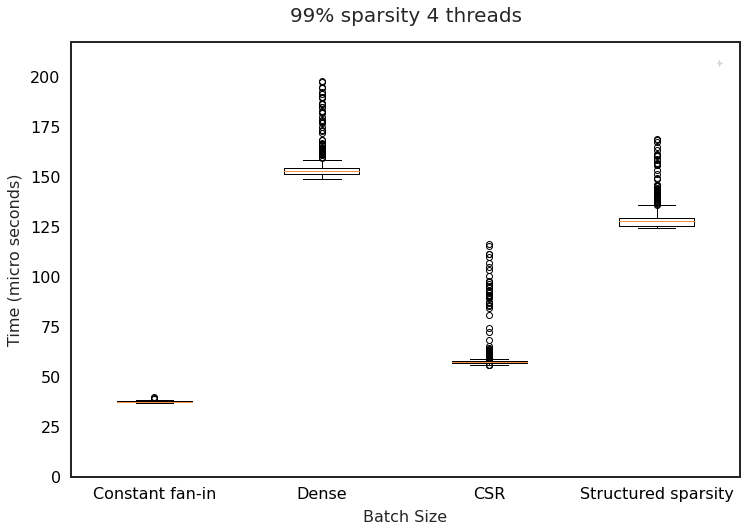

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


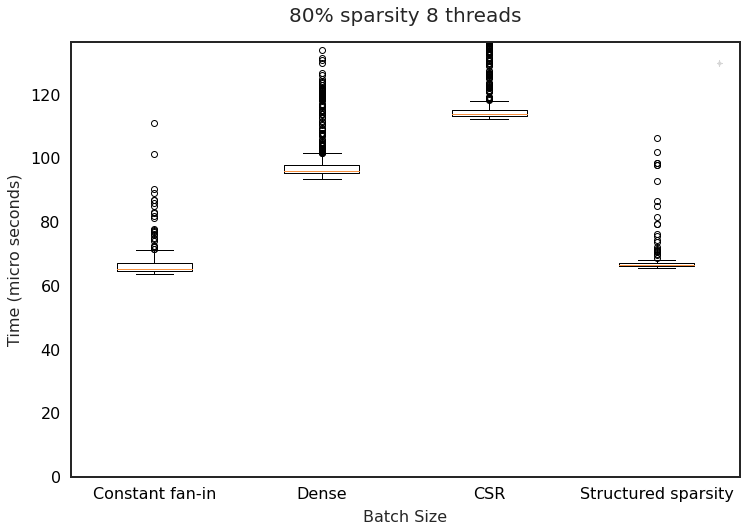

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


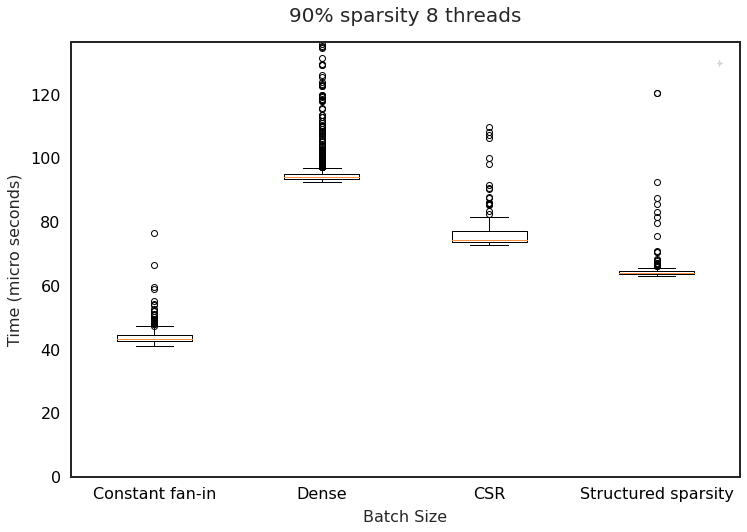

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


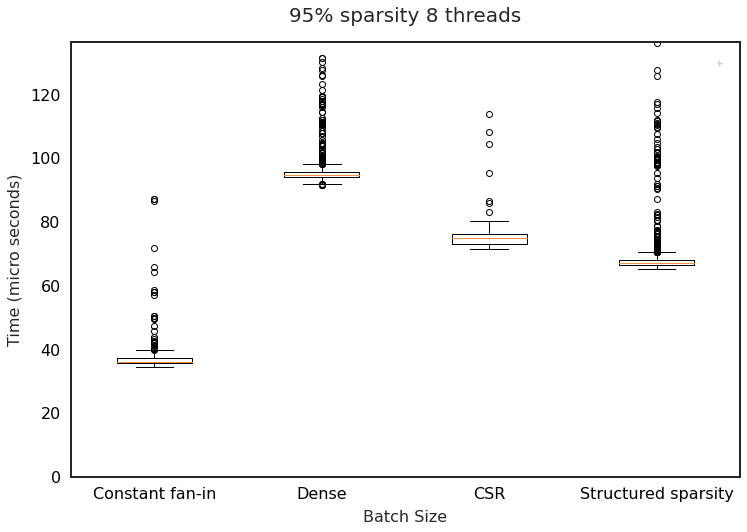

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


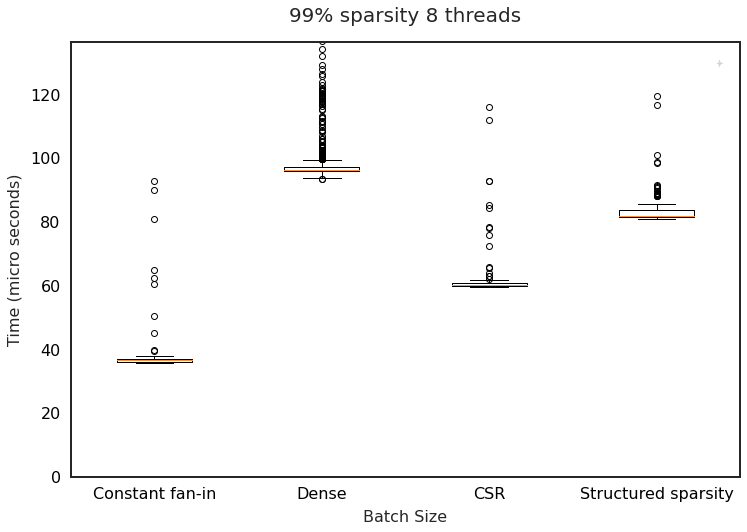

In [34]:
import re
import pandas as pd
import numpy as np
plt.style.use("../plt_plot_style.mplstyle")


import pickle
for threads in [1,2,4,8,]:
    device = "cpu"
    compiler = "inductor"
    dtype="torch.float32"
    file_name = f"benchmark_v2_{device}_threads_{threads}_compiler_{compiler}_dtype_{dtype}final_hector_second_run.pkl"
    with open(f"../{file_name}", "rb") as handle:
        compare = pickle.load(handle)
    # print(compare)

    _y_lim = None
    for _sparsity in [80, 90, 95, 99]:
        data = {
            "sparsity": [],
            "batch_size": [],
            "num_features": [],
            "time": [],
            "std": [],
            "description": [],
            "times":[]
        }
        # _sparsity = 99
        for measurement in compare._results:
            sparsity_match = re.match(f"Sparsity ([0-9]*)", measurement.title)
            sparsity = sparsity_match.groups()[0]

            thread_match = re.match(f".*with ([0-9]*) threads.*", measurement.title)
            threads = thread_match.groups()[0]
            desc = measurement.description
            if int(sparsity) not in [_sparsity,]:
                continue
            if desc not in target_descriptions.keys():
                continue
            # if desc == "Dense benchmark - Compiled - backend inductor" and int(sparsity) != 95:
            #     continue
            data["description"].append(target_descriptions[desc])
            data["sparsity"].append(int(sparsity))
            batch, num_features = re.findall(r"[0-9]+", measurement.sub_label)
            data["batch_size"].append(int(batch))
            data["num_features"].append(int(num_features))
            data["time"].append(measurement.median*1e6)
            data["times"].append([t*1e6 for t in measurement.times])
            data["std"].append(np.std(measurement.times)*1e6)

        df = pd.DataFrame(data)
        df = df.sort_values(by="batch_size", ascending=True)
        fig, ax = plt.subplots(figsize=(12,8))
        df = df.loc[df["batch_size"]<=64]  # TODO: Also sort by desc?
        lines = ["solid", "dashed", "dashdot", "dotted"]
        colours = ["red", "green", "blue", "orange"]
        df_slice = df.loc[(df["sparsity"] == _sparsity) & (df["batch_size"]==1)]
        ax.boxplot(df_slice["times"], labels=df_slice["description"])

        # # for i, d in enumerate(df["description"].unique()):
        #     colour = colours[i]
        #     df_slice = df.loc[(df["sparsity"] == _sparsity) & (df["description"]==d) & (df["batch_size"]==1)]
        #     # ax.boxplot(df_slice["times"], label=f"{d}", marker="x", color=colour)
        #     ax.boxplot(df_slice["times"])
        y_max = df.loc[(df["batch_size"]==1)]["time"].max() 
        if _y_lim is None:
            _y_lim = y_max + y_max * 0.2
        plt.ylim(top=_y_lim, bottom=0)
        plt.legend()
        plt.ylabel("Time (micro seconds)")
        plt.xlabel("Batch Size")
        # plt.grid(True, which="both")

        plt.title(f"{_sparsity}% sparsity {threads} threads")
        # ax.set_xscale("log")
        # ax.set_yscale("log")
        plt.show()
        fig.savefig(f"../figs/single-sample-threads-{threads}-sparsity-{_sparsity}.png", dpi=400, transparent=False)


In [31]:
df_slice[["description", "times"]]

,description,times
47,Constant fan-in,"[81.04223757982254, 105.75992986559868, 88.281..."
44,Dense,"[645.3693378716707, 573.2863210141659, 453.996..."
46,CSR,"[575.5268968641758, 549.5736841112375, 527.950..."
45,Structured sparsity,"[232.16847330331802, 231.37377575039864, 229.6..."


{'whiskers': [<matplotlib.lines.Line2D at 0x7f321d2fea40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f321d2ff010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f321d2fe770>],
 'medians': [<matplotlib.lines.Line2D at 0x7f321d2ff580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f321d2ff850>],
 'means': []}

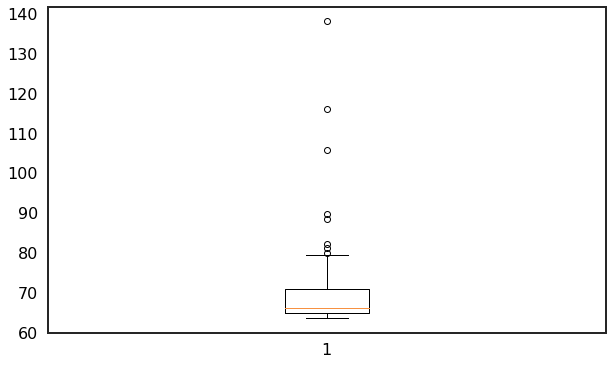

In [22]:
plt.boxplot(df_slice["times"])

In [17]:
## GPU Timings
import pickle
threads = 1
device = "gpu"
compiler = "inductor"
dtype="torch.float32"
file_name = f"benchmark_v2_{device}_threads_{threads}_compiler_{compiler}_dtype_{dtype}final.pkl"
with open(f"../{file_name}", "rb") as handle:
    compare = pickle.load(handle)
print(compare)

[---------------------------------------------------------------------------------------------------------------------------------- Sparsity 99 with 1 threads using compilation strategy inductor and dtype torch.float32 on device cuda. ---------------------------------------------------------------------------------------------------------------------------------]
                     |  Dense benchmark - eager  |  Structured sparsity - eager  |  structured + csr - eager  |  Vmap - eager  |  Fine-grained + structured - eager  |  Dense benchmark - Compiled - backend inductor  |  Structured sparsity compiled with backend - inductor  |  structured + csr with backend inductor  |  Fine-grained + structured with backend inductor
1 threads: -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

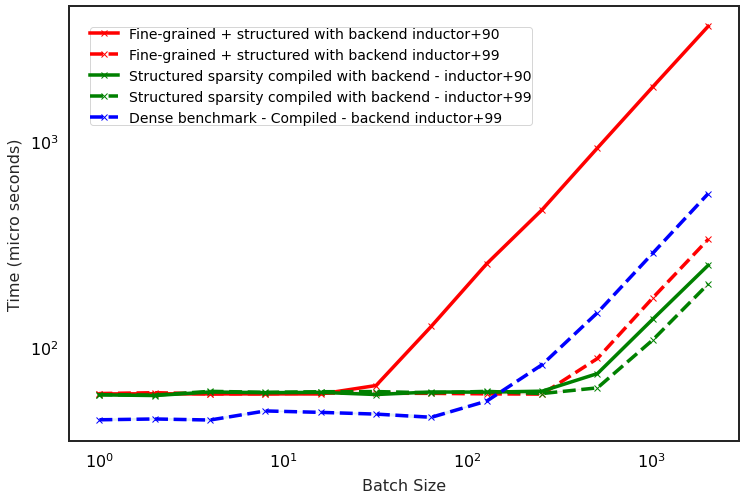

In [18]:
import re
import pandas as pd
import numpy as np
plt.style.use("../plt_plot_style.mplstyle")
target_descriptions = [
    "Fine-grained + structured with backend inductor",
    # "structured + csr with backend inductor",
    "Dense benchmark - Compiled - backend inductor",
    "Structured sparsity compiled with backend - inductor",
    # "Vmap - eager"
]
data = {
    "sparsity": [],
    "batch_size": [],
    "num_features": [],
    "time": [],
    "std": [],
    "description": []
}
for measurement in compare._results:
    sparsity_match = re.match(f"Sparsity ([0-9]*)", measurement.title)
    sparsity = sparsity_match.groups()[0]

    thread_match = re.match(f".*with ([0-9]*) threads.*", measurement.title)
    threads = thread_match.groups()[0]
    desc = measurement.description
    if int(sparsity) == 80:
        continue
    if desc not in target_descriptions:
        continue
    if desc == "Dense benchmark - Compiled - backend inductor" and int(sparsity) !=99:
        continue
    data["description"].append(desc)
    data["sparsity"].append(int(sparsity))
    batch, num_features = re.findall(r"[0-9]+", measurement.sub_label)
    data["batch_size"].append(int(batch))
    data["num_features"].append(int(num_features))
    data["time"].append(measurement.median*1e6)
    data["std"].append(np.std(measurement.times)*1e6)
df = pd.DataFrame(data)
df = df.sort_values(by="batch_size", ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
df = df.loc[df["batch_size"]<=2048]  # TODO: Also sort by desc?
lines = ["solid", "dashed", "dashdot", "dotted"]
colours = ["red", "green", "blue", "orange"]
for i, d in enumerate(df["description"].unique()):
    colour = colours[i]
    for ii, s in enumerate(df["sparsity"].unique()):
        line = lines[ii]
        df_slice = df.loc[(df["sparsity"] == s) & (df["description"]==d)]
        # df_slice = df_slice.groupby("batch_size").agg(mean_time=("time", "mean"), std_time=("time", "std")).reset_index()
        if len(df_slice) > 0:
            ax.plot(df_slice["batch_size"], df_slice["time"], label=f"{d}+{s}", marker="x", ls=line, color=colour)
            ax.fill_between(
                df_slice["batch_size"],
                df_slice["time"]+df_slice["std"],
                df_slice["time"]-df_slice["std"],
                alpha=0.2
            )
plt.legend()
plt.ylabel("Time (micro seconds)")
plt.xlabel("Batch Size")
# plt.title(f"{result_type.upper()} Benchmark")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()
fig.savefig("gpu_benchmark_v2.png", dpi=400, transparent=False)
